In [84]:
#known import statements
import matplotlib.pyplot as plt

# OOP: Special Methods

"Special methods" is a technical term referring to methods that get called automatically. In Python, they usually begin and end with double underscores.
- **Note:** you could define a regular method with `__<method>__`.

### `__init__` special method (aka Constructor)

- automatically invoked when creating an object instance
- only one possible constructor in Python

## Earthquake example

In [1]:
# represent earthquakes using classes

quake_dicts = [   
    {   'loc': {'lat': 35.6791667, 'lon': -117.5221667},
        'mag': 1.56,
        'place': '14km SW of Searles Valley, CA',
        'time': 1634775231730},
    {   'loc': {'lat': 43.8144, 'lon': 84.2395},
        'mag': 4.6,
        'place': '90 km ENE of Xinyuan, China',
        'time': 1634775144081},
    {   'loc': {'lat': 60.1499, 'lon': -153.0747},
        'mag': 1.7,
        'place': '69 km E of Port Alsworth, Alaska',
        'time': 1634775046520},
    {   'loc': {'lat': 19.2353324890137, 'lon': -155.408340454102},
        'mag': 1.99000001,
        'place': '8 km ENE of P?hala, Hawaii',
        'time': 1634774881920},
    {   'loc': {'lat': 61.1456, 'lon': -151.1505},
        'mag': 1.4,
        'place': '3 km W of Beluga, Alaska',
        'time': 1634774737242}]

def place_miles(quake):
    """
    converts "place" km to miles
    """
    place = quake["place"]
    km_idx = place.find("km")
    
    if km_idx < 0:
        return place
    
    num = place[:km_idx].strip()
    if not num.isdigit():
        return place
    
    miles = round(float(num) * 0.621371, 2)
    return f"{miles} miles{place[km_idx+2:]}"

place_miles(quake_dicts[4])

'1.86 miles W of Beluga, Alaska'

### Two possible classes: `Earthquake` and `Location`.

In [2]:
# TODO: create Location class
class Location:
    def __init__(self, lat, lon):
        self.lat = lat
        self.lon = lon
        
    def __str__(self):
        return f"Location at lat: {self.lat}, lon {self.lon}"
        
    def __repr__(self):
        return f"Location({self.lat}, {self.lon})"
    
    def __eq__(self, other):
        return self.lat == other.lat and self.lon == other.lon
        
# create Location object instance
loc1 = Location(36.473, -98.7745)
loc2 = Location(61.3898, -150.0462)

#### We can use attribute operator (`.`) to access attributes and print it.

In [3]:
print(loc1.lat)

36.473


#### What if we pass the object instance itself as argument to `print`?

In [4]:
print(loc1)

Location at lat: 36.473, lon -98.7745


#### Or display the reference variable?

In [5]:
loc1

Location(36.473, -98.7745)

### `__str__` and `__repr__` special methods

- `__str__` is implicitly invoked when we invoke `print` (user friendly form)
- `__rep__` (aka representation) is implicitly invoked when displaying the object instance (programmer friendly form)
- Both methods must return a `str` value

In [6]:
s = "A\nB"
print(s) # invokes __str__

A
B


In [7]:
s # invokes __repr__

'A\nB'

In [8]:
# TODO: go back and define __str__ and __repr__ methods for Loction class

In [9]:
print(loc1)

Location at lat: 36.473, lon -98.7745


In [10]:
loc1

Location(36.473, -98.7745)

### `_repr_html` special method --- `jupyter` special method (not a special method for Python)

- Observe that we have single `_`instead of `__`
- Enables us to create a HTML display for the object instances
- Invoked when using displaying reference variable inside `jupyter`
- **IMPORTANT**: `_repr_html_` won't work in `.py` script file
- Used by `pandas` to display `DataFrame` (uses HTML table format)

In [11]:
# TODO: create Earthquake class

class Earthquake:
    def __init__(self, quake_details):
        self.place = place_miles(quake_details)
        self.time = quake_details["time"]
        self.mag = quake_details["mag"]
        self.loc = Location(quake_details["loc"]["lat"], quake_details["loc"]["lon"])
        
    def __repr__(self):
        return f"Magnitude {self.mag} earthquake at {self.place} ({self.loc})"
        
    def _repr_html_(self):
        # assumes largest mag is 6
        size = 6 - int(round(self.mag)) 
        # size is a local variable, not an attribute
        return f"<h{size}>Magnitude {self.mag} earthquake at {self.place} ({self.loc})</h{size}>"
    
    def __lt__(self, other):
        return self.mag < other.mag
        
e1 = Earthquake(quake_dicts[0])
e2 = Earthquake(quake_dicts[1])
e3 = Earthquake(quake_dicts[4])

In [12]:
e1

Magnitude 1.56 earthquake at 8.7 miles SW of Searles Valley, CA (Location at lat: 35.6791667, lon -117.5221667)

In [13]:
e2

Magnitude 4.6 earthquake at 55.92 miles ENE of Xinyuan, China (Location at lat: 43.8144, lon 84.2395)

In [14]:
e3

Magnitude 1.4 earthquake at 1.86 miles W of Beluga, Alaska (Location at lat: 61.1456, lon -151.1505)

#### If we have a list of references, `jupyter` defaults back to `__repr__`

In [15]:
# TODO: go back and define __repr__ special method for Earthquake class
[e1, e2, e3]

[Magnitude 1.56 earthquake at 8.7 miles SW of Searles Valley, CA (Location at lat: 35.6791667, lon -117.5221667),
 Magnitude 4.6 earthquake at 55.92 miles ENE of Xinyuan, China (Location at lat: 43.8144, lon 84.2395),
 Magnitude 1.4 earthquake at 1.86 miles W of Beluga, Alaska (Location at lat: 61.1456, lon -151.1505)]

### `__eq__` special method

- Enables us to define how `==` should work when we compare two object instances of our custom class type
- Automatically invoked when using `==` comparison operator
- Takes two arguments (two object instances: `self` and other)
- Must return a `bool` value

In [16]:
# TODO: go back and define __eq__ special method for Location class

In [17]:
loc1 == loc1 # implicitly invokes loc1.__eq__(loc1)

True

In [18]:
loc1 == loc2 # implicitly invokes loc1.__eq__(loc2)

False

### `__lt__` special method

- Enables us to define how `<` should work when we compare two object instances of our custom class type
- Automatically invoked when using `<` comparison operator
- Takes two arguments (two object instances: `self` and other)
- Must return a `bool` value
- Enables us to sort a list of object instances

In [19]:
# TODO: go back and define __eq__ special method for Earthquake class

In [20]:
e1 < e2 # implicitly invokes e1.__lt__(e2)

True

In [21]:
e2 < e3 # implicitly invokes e2.__lt__(e3)

False

### `sort` on a list of earthquakes

#### Creating a list of `Earthquake` object instances using traditional `for` loop.

In [22]:
quakes = []

for quake_dict in quake_dicts:
    quakes.append(Earthquake(quake_dict))
    
quakes

[Magnitude 1.56 earthquake at 8.7 miles SW of Searles Valley, CA (Location at lat: 35.6791667, lon -117.5221667),
 Magnitude 4.6 earthquake at 55.92 miles ENE of Xinyuan, China (Location at lat: 43.8144, lon 84.2395),
 Magnitude 1.7 earthquake at 42.87 miles E of Port Alsworth, Alaska (Location at lat: 60.1499, lon -153.0747),
 Magnitude 1.99000001 earthquake at 4.97 miles ENE of P?hala, Hawaii (Location at lat: 19.2353324890137, lon -155.408340454102),
 Magnitude 1.4 earthquake at 1.86 miles W of Beluga, Alaska (Location at lat: 61.1456, lon -151.1505)]

#### Creating a list of `Earthquake` object instances using comprehension

In [23]:
quakes = [Earthquake(quake_dict) for quake_dict in quake_dicts]
quakes

[Magnitude 1.56 earthquake at 8.7 miles SW of Searles Valley, CA (Location at lat: 35.6791667, lon -117.5221667),
 Magnitude 4.6 earthquake at 55.92 miles ENE of Xinyuan, China (Location at lat: 43.8144, lon 84.2395),
 Magnitude 1.7 earthquake at 42.87 miles E of Port Alsworth, Alaska (Location at lat: 60.1499, lon -153.0747),
 Magnitude 1.99000001 earthquake at 4.97 miles ENE of P?hala, Hawaii (Location at lat: 19.2353324890137, lon -155.408340454102),
 Magnitude 1.4 earthquake at 1.86 miles W of Beluga, Alaska (Location at lat: 61.1456, lon -151.1505)]

#### `sort` method on a list enables us to sort in-place (that is modifies the original list object instance ordering)

- `sort` uses <, which uses `obj1 < obj2` which is the same as `obj1.__lt__(obj2)`.

In [25]:
quakes.sort()
quakes

[Magnitude 1.4 earthquake at 1.86 miles W of Beluga, Alaska (Location at lat: 61.1456, lon -151.1505),
 Magnitude 1.56 earthquake at 8.7 miles SW of Searles Valley, CA (Location at lat: 35.6791667, lon -117.5221667),
 Magnitude 1.7 earthquake at 42.87 miles E of Port Alsworth, Alaska (Location at lat: 60.1499, lon -153.0747),
 Magnitude 1.99000001 earthquake at 4.97 miles ENE of P?hala, Hawaii (Location at lat: 19.2353324890137, lon -155.408340454102),
 Magnitude 4.6 earthquake at 55.92 miles ENE of Xinyuan, China (Location at lat: 43.8144, lon 84.2395)]

Unlike `sort` method, `sorted` built-in function returns a new list (new object instance with sorted values).

In [30]:
# repeating list comprehension because we used `sort` on quakes list; so it is now sorted
sorted_quakes = sorted([Earthquake(quake_dict) for quake_dict in quake_dicts]) 
sorted_quakes

[Magnitude 1.4 earthquake at 1.86 miles W of Beluga, Alaska (Location at lat: 61.1456, lon -151.1505),
 Magnitude 1.56 earthquake at 8.7 miles SW of Searles Valley, CA (Location at lat: 35.6791667, lon -117.5221667),
 Magnitude 1.7 earthquake at 42.87 miles E of Port Alsworth, Alaska (Location at lat: 60.1499, lon -153.0747),
 Magnitude 1.99000001 earthquake at 4.97 miles ENE of P?hala, Hawaii (Location at lat: 19.2353324890137, lon -155.408340454102),
 Magnitude 4.6 earthquake at 55.92 miles ENE of Xinyuan, China (Location at lat: 43.8144, lon 84.2395)]

### List of all special methods for comparison

```python
object.__lt__(self, other)
object.__le__(self, other)
object.__eq__(self, other)
object.__ne__(self, other)
object.__gt__(self, other)
object.__ge__(self, other)
```

In [27]:
e1 <= e2 # need to implement special method __le__

TypeError: '<=' not supported between instances of 'Earthquake' and 'Earthquake'

### `range` built-in function review

In [31]:
for i in range(10):
    print(i) # sequence of numbers from 0 to 9

0
1
2
3
4
5
6
7
8
9


In [32]:
for i in range(2, 10):
    print(i) # sequence of numbers from 2 to 9

2
3
4
5
6
7
8
9


We can store this sequence into a variable and use typical sequence operations (ex: indexing, slicing, etc.,).

In [33]:
r = range(2, 10)

In [35]:
print(r[0])
print(r[1])
print(r[-1])

2
3
9


In [36]:
r[:2] # displays the corresponding range function call

range(2, 4)

### `__getitem__` special method
- `obj[key]` => `obj.__getitem__(key)`
- enables us to define how lookup / indexing (aka subscript) works
- Must return an appropriate object instance

### `Range` class

In [55]:
class Range:
    # our version
    def __init__(self, v1, v2=None):
        if v2 != None:
            self.lower = v1
            self.upper = v2
        else:
            self.lower = 0
            self.upper = v1
            
    def __getitem__(self, index):
        if index >= self.upper-self.lower:
            raise IndexError("Index out of bounds!")
        if index < 0:
            raise NotImplementedError("Negative indexing not supported yet.")
        return self.lower + index

In [56]:
r = Range(2, 10)
print(r[0]) # should be 2

2


In [57]:
# TODO: go back and define __getitem__ for Range

In [58]:
print(r[1]) # should be 3

3


In [59]:
print(r[20]) # this is bad

IndexError: index too big

In [60]:
# TODO: go back and handle out of range
# Let's raise IndexError

In [61]:
print(r[20]) 

IndexError: index too big

In [62]:
print(r[-1]) # this is bad

NotImplementedError: negative indexing not supported yet

In [ ]:
# TODO: go back and handle out of range
# Let's raise NotImplementedError

In [ ]:
print(r[-1]) # this is bad

In [63]:
for num in r: # looks at r[0], r[1], r[2], keeps going until it encounters IndexError
    print(num)

2
3
4
5
6
7
8
9


### Context Managers
- objects that you can use with the `with` statement

Regular way of writing content into file.

In [67]:
f = open("file.txt", "w")
f.write("hello, ")
f.write("world!\n")
f.close()

Regular way of reading content from a file.

In [68]:
f = open("file.txt")
print(f.read())
f.close()

hello, world!



What if we crashed in the middle of having a file open for writing? That is a problem. 

In [72]:
f = open("crash.txt", "w")
f.write("hi")
assert 1 == 2 # CRASH
f.write("bye")
f.close()

AssertionError: 

Writing files is a slow operation. Python `write` doesn't directly go on to disk. Instead the file object buffers the data in memory (RAM). Eventually all the data gets written to disk - when we `close` the file object.

#### Using `with` for reading content from a file
- automatically closes file handle even if there an error

In [74]:
with open("crash.txt", "w") as f:
    f.write("hi")
    assert 1 == 2 # CRASH
    f.write("bye")

AssertionError: 

### `matplotlib` review

- `subplots` function enable us to create an empty plot
- `rcParams` is like a `dict`, which contains various aesthetic settings, including "font.size"

(<Figure size 100x100 with 1 Axes>, <AxesSubplot:>)

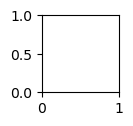

In [79]:
plt.subplots(figsize=(1,1))

In [81]:
plt.rcParams["font.size"]

10.0

### Context Managers for custom classes: `__enter__` and `__exit__` special methods
- special methods: `__enter__` and `__exit__`
- `with` statement automatically invokes both `__enter__` and `__exit__` special methods

### `DoubleFont` class

- let's define a class which will enable us double the font in plots when we use it
- once we are done using it, we want the font size to go back to normal (using `with`)
- Goal:
```python
plt.subplots(figsize=(1,1)) # regular font
with DoubleFont():
    plt.subplots(figsize=(1,1)) # large font
plt.subplots(figsize=(1,1)) # regular font
```

ENTER
EXIT


(<Figure size 100x100 with 1 Axes>, <AxesSubplot:>)

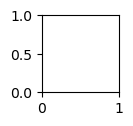

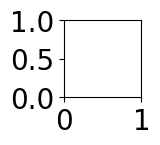

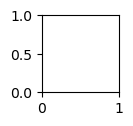

In [83]:
class DoubleFont:
    def __enter__(self):
        print("ENTER")
        self.old_size = plt.rcParams["font.size"]
        plt.rcParams["font.size"] *= 2
        
    def __exit__(self, exc_type, exc_value, traceback):
        print("EXIT")
        plt.rcParams["font.size"] = self.old_size

plt.subplots(figsize=(1,1)) # regular font
with DoubleFont():
    plt.subplots(figsize=(1,1)) # large font
plt.subplots(figsize=(1,1)) # regular font

### OOP Inheritance

- ability to leverage existing classes and methods to create new classes that are similar
- Hierarchy

<div>
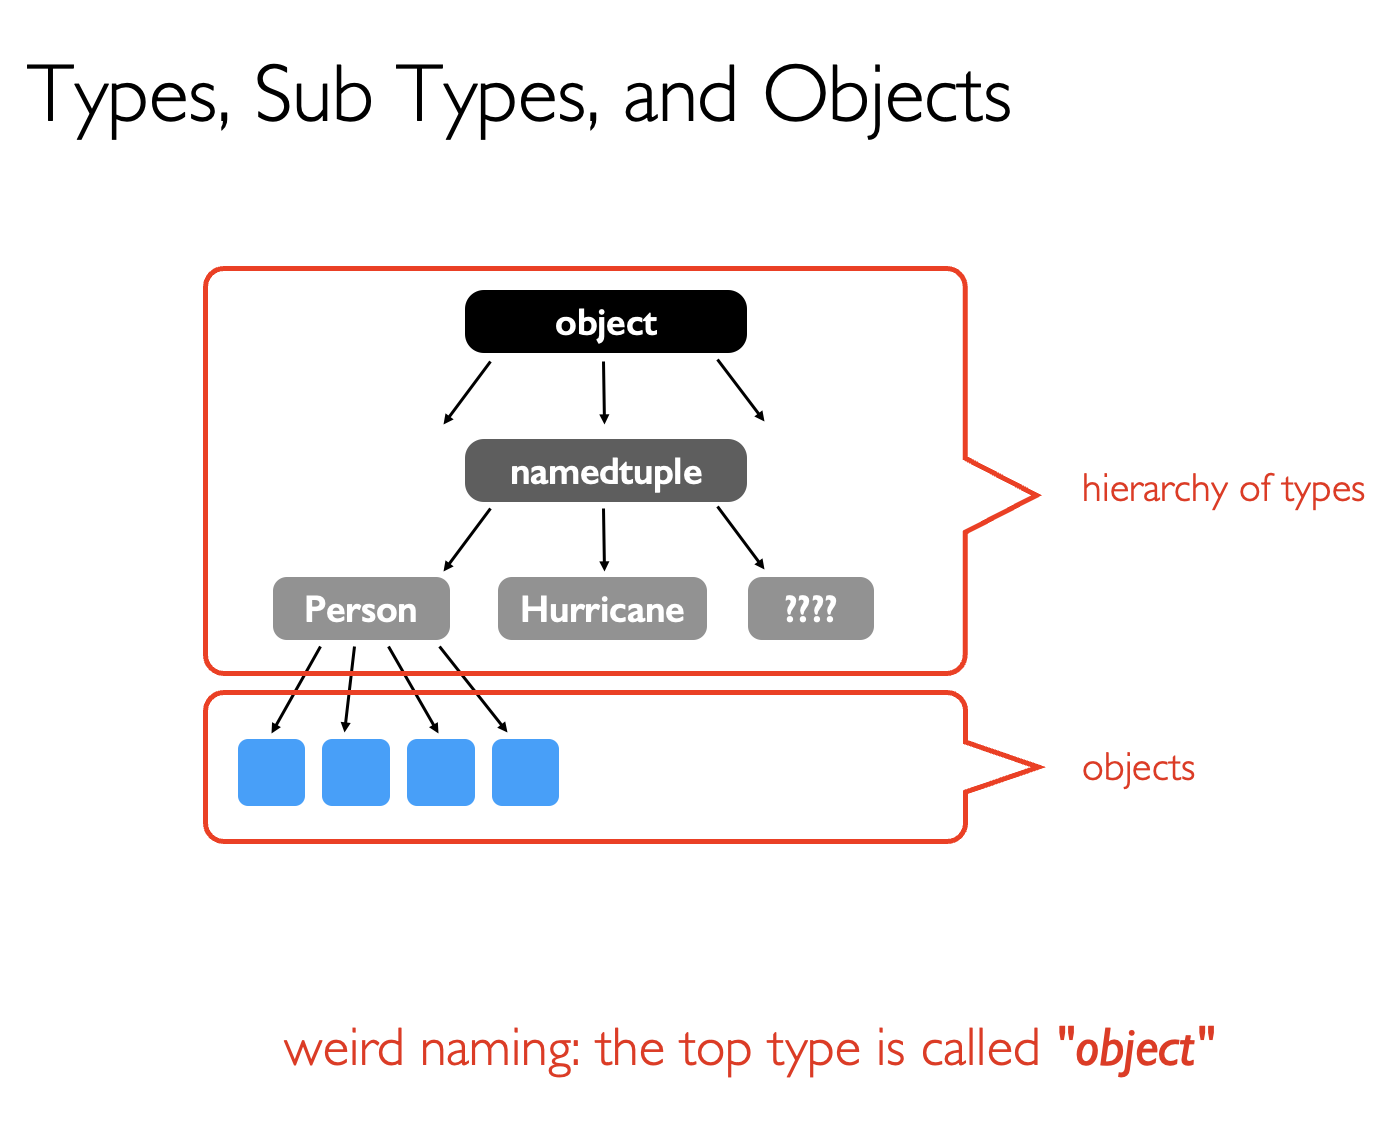
</div>

In [ ]:
class Animal:
    def __init__(self, name):
        self.name = name    

    def __str__(self):
        return f"{type(self).__name__} {self.name}"

    def __repr__(self):
        return f"{type(self).__name__}('{self.name}')"
        
class Rabbit(Animal):
    def __str__(self):  # this method overrides the version we inherited
        return "I'm a rabbit (TEST!)"

class Dog(Animal):
    def __init__(self, name, age): # sometimes want to override AND call the parent version
        #Animal.__init__(self, name)
        super().__init__(name)      # super() is like self, but a level up
        self.age = age
    
    def speak(self):
        print("bark")

fido = Dog("Fido", 3)
print(fido)

ruby = Rabbit("Ruby")
print(ruby)